In [9]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

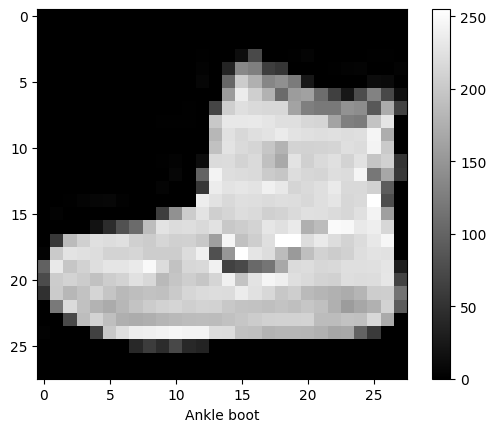

In [10]:
# 2. Fashion-MNIST 데이터 준비
# TensorFlow Keras에 내장된 Fashion-MNIST 데이터셋을 불러옵니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 이름 정의 (0~9에 해당하는 패션 아이템)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 형태 확인 및 첫 번째 이미지 출력
# print(X_train.shape) # (60000, 28, 28)
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])
plt.show()

In [11]:
# 3. 데이터 전처리
# 픽셀 값을 0~255에서 0~1 사이로 정규화합니다.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# 4. DNN 모델 생성
model = models.Sequential([
    # Flatten 층: 28x28 픽셀의 2D 이미지를 784개의 1D 배열로 변환합니다.
    layers.Flatten(input_shape=(28, 28)),

    # 첫 번째 Dense 층 (은닉층)
    # 128개의 노드를 가집니다.
    layers.Dense(64, activation='relu'),

    layers.Dropout(0.3),  # 30%의 뉴런을 랜덤하게 비활성화

    # 출력 층
    # 10개의 노드(10개 패션 아이템)로 최종 결과를 출력합니다.
    layers.Dense(10, activation='softmax')
])

# 모델 구조 요약
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 5. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# 6. 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # 훈련 데이터의 20%를 검증용으로 사용
    epochs=30,            # 전체 데이터를 30번 반복 학습
    batch_size=32,
    verbose=1
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7024 - loss: 0.8649 - val_accuracy: 0.8303 - val_loss: 0.4590
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8287 - loss: 0.4824 - val_accuracy: 0.8565 - val_loss: 0.3964
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8438 - loss: 0.4363 - val_accuracy: 0.8587 - val_loss: 0.3850
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8486 - loss: 0.4166 - val_accuracy: 0.8595 - val_loss: 0.3755
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.3970 - val_accuracy: 0.8671 - val_loss: 0.3620
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8581 - loss: 0.3869 - val_accuracy: 0.8649 - val_loss: 0.3810
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8610 - loss: 0.3717 - val_accuracy: 0.8730 - val_loss: 0.3537
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.3625 - 

In [15]:
# 테스트 데이터 예측 및 성능 리포트 출력
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\n[ 분류 보고서 ]")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

[ 분류 보고서 ]
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.78      0.76      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.73      0.86      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.70      0.65      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



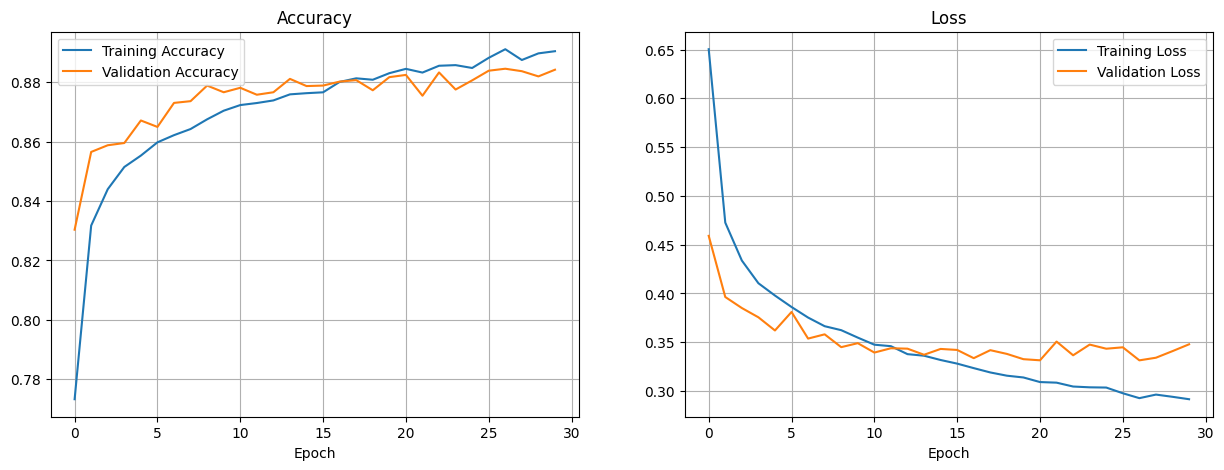

In [16]:
# 8. 학습 과정 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 정확도 그래프
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True)

# 손실 그래프
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True)

plt.show()